In [1]:
print(list(range(1,10,1)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
import numpy as np
import cmath
import random
import matplotlib.pyplot as plt

In [18]:
# 表1数据
drone_location_polar = [
    [0, 0],
    [100, 0],
    [98, 40.10],
    [112, 80.21],
    [105, 119.75],
    [98, 159.86],
    [112, 199.96],
    [105, 240.07],
    [98, 280.17],
    [112, 320.28]
]
# 无人机位置无偏差坐标
drone_ideal_location_polar = [
    [0, 0],
    [100, 0],
    [100, 40],
    [100, 80],
    [100, 120],
    [100, 160],
    [100, 200],
    [100, 240],
    [100, 280],
    [100, 320]
]
drone_location_cartesian = []
drone_ideal_location_cartesian = []

In [19]:
def plot_location(location):
    x = []
    y = []
    for i in location:
        x.append(i[0])
        y.append(i[1])
    plt.scatter(x, y)
    plt.show()

In [20]:
def calc_all_distance(drone_testing_location):
    distance = 0
    for i in range(1, len(drone_testing_location)):
        distance += calc_distance(drone_testing_location[i], drone_ideal_location_cartesian[i])
    return distance

def q3_adjust_location(drone_testing_location, drone_sender_1, drone_sender_2, drone_sender_3, drone_recipient):
    print(f"校准前：{calc_all_distance(drone_testing_location)}")
    adjustment_range = 8
    precision = 1
    for drone_id in drone_recipient:
        location_cost = []
        min_cost = 1000000
        min_cost_idx = -1
        for i in np.arange(adjustment_range * -1, adjustment_range + precision, precision):
            for i2 in np.arange(adjustment_range * -1, adjustment_range + precision, precision):
                location = list(drone_testing_location[drone_id])
                location[0] += i
                location[1] += i2
                angle = [calc_angle(location, drone_testing_location[drone_sender_1], drone_testing_location[drone_sender_2]),
                        calc_angle(location, drone_testing_location[drone_sender_1], drone_testing_location[drone_sender_3])]
                angle_cost = cost(angle,
                                 [calc_angle(drone_ideal_location_cartesian[drone_id], drone_testing_location[drone_sender_1], drone_testing_location[drone_sender_2]),
                                 calc_angle(drone_ideal_location_cartesian[drone_id], drone_testing_location[drone_sender_1], drone_testing_location[drone_sender_3])])
                if angle_cost < min_cost:
                    min_cost = angle_cost
                    min_cost_idx = len(location_cost)
                location_cost.append([location, angle])
        drone_testing_location[drone_id] = location_cost[min_cost_idx][0]
    print(f"校准后：{calc_all_distance(drone_testing_location)}")
    
def q3_adjust_first_column(drone_testing_location):
    adjustment_range = 8
    prcision  = 0.1
    for drone_id in [2, 3, 4]:
        location_cost = []
        min_cost = 1000000
        min_cost_idx = -1
        for i in np.arange(adjustment_range * -1, adjustment_range + prcision, prcision):
            location = list(drone_testing_location[drone_id])
            location[0] += i
            angle = calc_angle(location, drone_testing_location[0], drone_testing_location[1])
            if angle < min_cost:
                min_cost = angle
                min_cost_idx = len(location_cost)
            location_cost.append([location, angle])
        drone_testing_location[drone_id] = location_cost[min_cost_idx][0]    
                               

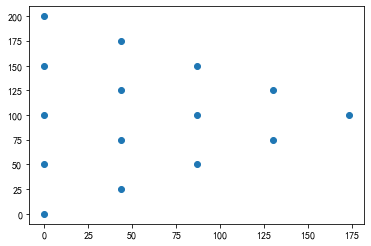

In [21]:
'''问题二'''
# 无人机如锥形编队位置无偏差直角
x = np.sqrt(50**2 - 25**2)
drone_ideal_location_cartesian = [
    # 第1列
    [0, 0],
    [0, 50],
    [0, 100],
    [0, 150],
    [0, 200],
    # 第2列
    [x, 25],
    [x, 75],
    [x, 125],
    [x, 175],
    # 第3列
    [2 * x, 50],
    [2 * x, 100],
    [2 * x, 150],
    # 第4列
    [3 * x, 75],
    [3 * x, 125],
    # 第5列
    [4 * x, 100]
]
plot_location(drone_ideal_location_cartesian)

In [22]:
drone_testing_location = []
for i in range(len(drone_location_cartesian)):
    drone_testing_location.append(list(drone_location_cartesian[i]))
distance = 0
for i in range(1, len(drone_testing_location)):
    distance += calc_distance(drone_testing_location[i], drone_ideal_location_cartesian[i])
distance

0